In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
def f(x):
    return 3*x**2 + 2*x + 1

In [11]:
f(3.0)

34.0

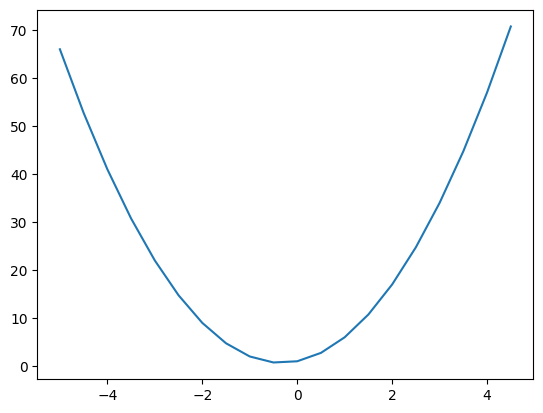

In [12]:
xs = np.arange(-5, 5, 0.5)
ys = f(xs)
plt.plot(xs, ys)
plt.show()

In [13]:
h = 0.00000001
x = 3.0
(f(x + h) - f(x))/h

20.00000023372195

In [14]:
print("hello world")

hello world


In [15]:
#lets get more complex

#inputs
a = 2.0
b = -3.0
c = 10.0


d1 = a*b + c
a += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h)

d1 4.0
d2 3.99999997
slope -2.999999981767587


In [62]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
d = a*b; d.label = 'd'
e = d + c; e.label = 'e'
f = Value(-2.0, label = 'f')
L = e * f; L.label = 'L'
L

Value(data=-8.0)

In [63]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format = 'svg', graph_attr={'rankdir': 'LR'})

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        #for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f }" % (n.label, n.data), shape='record')
        if n._op:
            dot.node(name = uid + n._op, label = n._op)
            dot.edge(uid + n._op, uid)
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

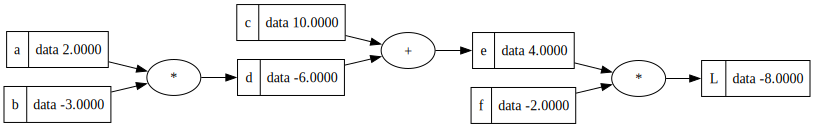

In [64]:
draw_dot(L)